In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
from IPython.display import display
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline
mpl.style.use('ggplot')
sns.set_style('white')


# Setting matplotlib defaults 
plt.style.use('seaborn-whitegrid')
plt.rc('figure' , autolayout = True)
plt.rc(
    'axes',
    labelweight = 'bold',
    labelsize = 'small',
    titleweight = 'bold',
    titlesize = 14,
    titlepad = 10
 
  )


df = pd.read_csv("/kaggle/input/widsdatathon2023/train_data.csv", index_col = "index")
df_test = pd.read_csv("/kaggle/input/widsdatathon2023/test_data.csv", index_col = "index")

In [5]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 375734 entries, 0 to 375733
Columns: 245 entries, lat to wind-vwnd-925-2010-20
dtypes: float64(240), int64(3), object(2)
memory usage: 705.2+ MB


None

In [32]:
target = "contest-tmp2m-14d__tmp2m"

In [22]:
def handle_missing_value(df):
    total = df.isnull().sum().sort_values(ascending = False)
    percent = (df.isnull().sum() / df.isnull().count() * 100).sort_values(ascending = False)
    missing_data = pd.DataFrame({"Total": total, "Percent": percent})
    
    missing_cols = missing_data.loc[missing_data["Percent"] > 0].index
    
    for i in missing_cols:
        df[i] = df[i].fillna(value = df[i].mean())
    display(df.isnull().sum().max())

handle_missing_value(df)

0

In [24]:
display(df.head())

,lat,lon,startdate,contest-pevpr-sfc-gauss-14d__pevpr,nmme0-tmp2m-34w__cancm30,nmme0-tmp2m-34w__cancm40,nmme0-tmp2m-34w__ccsm30,nmme0-tmp2m-34w__ccsm40,nmme0-tmp2m-34w__cfsv20,nmme0-tmp2m-34w__gfdlflora0,...,wind-vwnd-925-2010-11,wind-vwnd-925-2010-12,wind-vwnd-925-2010-13,wind-vwnd-925-2010-14,wind-vwnd-925-2010-15,wind-vwnd-925-2010-16,wind-vwnd-925-2010-17,wind-vwnd-925-2010-18,wind-vwnd-925-2010-19,wind-vwnd-925-2010-20
index,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.833333,9/1/14,237.00,29.02,31.64,29.57,30.73,29.71,31.52,...,-27.68,-37.21,8.32,9.56,-2.03,48.13,28.09,-13.50,11.90,4.58
1,0.0,0.833333,9/2/14,228.90,29.02,31.64,29.57,30.73,29.71,31.52,...,-21.13,-36.57,8.77,21.17,4.44,48.60,27.41,-23.77,15.44,3.42
2,0.0,0.833333,9/3/14,220.69,29.02,31.64,29.57,30.73,29.71,31.52,...,-10.72,-34.16,6.99,32.16,5.01,48.53,19.21,-33.16,15.11,4.82
3,0.0,0.833333,9/4/14,225.28,29.02,31.64,29.57,30.73,29.71,31.52,...,0.33,-31.04,6.17,39.66,-1.41,50.59,8.29,-37.22,18.24,9.74
4,0.0,0.833333,9/5/14,237.24,29.02,31.64,29.57,30.73,29.71,31.52,...,9.83,-31.80,7.47,38.62,-5.21,54.73,-2.58,-42.30,21.91,10.95


In [28]:
from datetime import datetime
def convert_stringtime_to_datetime(date):
    try:
        dt_obj = datetime.strptime(date, "%m/%d/%y")
        return dt_obj
    
    except ValueError:
        # Handle out of month errors by returning None
        return None
    
convert_stringtime_to_datetime("9/4/14")

datetime.datetime(2014, 9, 4, 0, 0)

In [29]:
corr_matrix = df.corr()

In [50]:
i = corr_matrix[target]

def get_index(input: pd.Series, threshold: float):
    """
    Returns the index of values in a pandas series that are greater than a specified threshold.
    
    Parameters:
        input (pd.Series): The input pandas series.
        threshold (float): The threshold value.
    
    Returns:
        pd.Index: The index of values greater than the threshold.
    """
    return input[input > threshold].index

display(i[i >= 0.3].sort_values(ascending = False))
# 60 columns

contest-tmp2m-14d__tmp2m                    1.000000
nmme-tmp2m-56w__cfsv2                       0.954668
nmme-tmp2m-34w__cfsv2                       0.954483
nmme-tmp2m-56w__nmmemean                    0.950865
nmme-tmp2m-34w__nmmemean                    0.950187
nmme-tmp2m-56w__gfdlflora                   0.949846
nmme-tmp2m-34w__gfdlflorb                   0.949346
nmme-tmp2m-56w__gfdlflorb                   0.949016
nmme-tmp2m-34w__gfdlflora                   0.947379
nmme-tmp2m-56w__ccsm4                       0.944435
nmme-tmp2m-34w__ccsm4                       0.943234
nmme-tmp2m-56w__nasa                        0.941429
nmme-tmp2m-34w__nasa                        0.940128
nmme-tmp2m-56w__gfdl                        0.937179
nmme-tmp2m-34w__gfdl                        0.936684
nmme-tmp2m-34w__cancm3                      0.931658
nmme-tmp2m-56w__cancm3                      0.930164
nmme-tmp2m-34w__cancm4                      0.928570
nmme-tmp2m-56w__cancm4                      0.

In [51]:
new_cols = i[i > 0.3].index
display(new_cols)
display(len(new_cols))

Index(['contest-pevpr-sfc-gauss-14d__pevpr', 'nmme0-tmp2m-34w__cancm30',
       'nmme0-tmp2m-34w__cancm40', 'nmme0-tmp2m-34w__ccsm30',
       'nmme0-tmp2m-34w__ccsm40', 'nmme0-tmp2m-34w__cfsv20',
       'nmme0-tmp2m-34w__gfdlflora0', 'nmme0-tmp2m-34w__gfdlflorb0',
       'nmme0-tmp2m-34w__gfdl0', 'nmme0-tmp2m-34w__nasa0',
       'nmme0-tmp2m-34w__nmme0mean', 'contest-wind-h10-14d__wind-hgt-10',
       'nmme-tmp2m-56w__cancm3', 'nmme-tmp2m-56w__cancm4',
       'nmme-tmp2m-56w__ccsm3', 'nmme-tmp2m-56w__ccsm4',
       'nmme-tmp2m-56w__cfsv2', 'nmme-tmp2m-56w__gfdl',
       'nmme-tmp2m-56w__gfdlflora', 'nmme-tmp2m-56w__gfdlflorb',
       'nmme-tmp2m-56w__nasa', 'nmme-tmp2m-56w__nmmemean',
       'contest-wind-h100-14d__wind-hgt-100', 'contest-tmp2m-14d__tmp2m',
       'nmme-tmp2m-34w__cancm3', 'nmme-tmp2m-34w__cancm4',
       'nmme-tmp2m-34w__ccsm3', 'nmme-tmp2m-34w__ccsm4',
       'nmme-tmp2m-34w__cfsv2', 'nmme-tmp2m-34w__gfdl',
       'nmme-tmp2m-34w__gfdlflora', 'nmme-tmp2m-34w__gfdlflo

60

In [52]:
new_corr_matrix = df[new_cols].corr()

<AxesSubplot:>

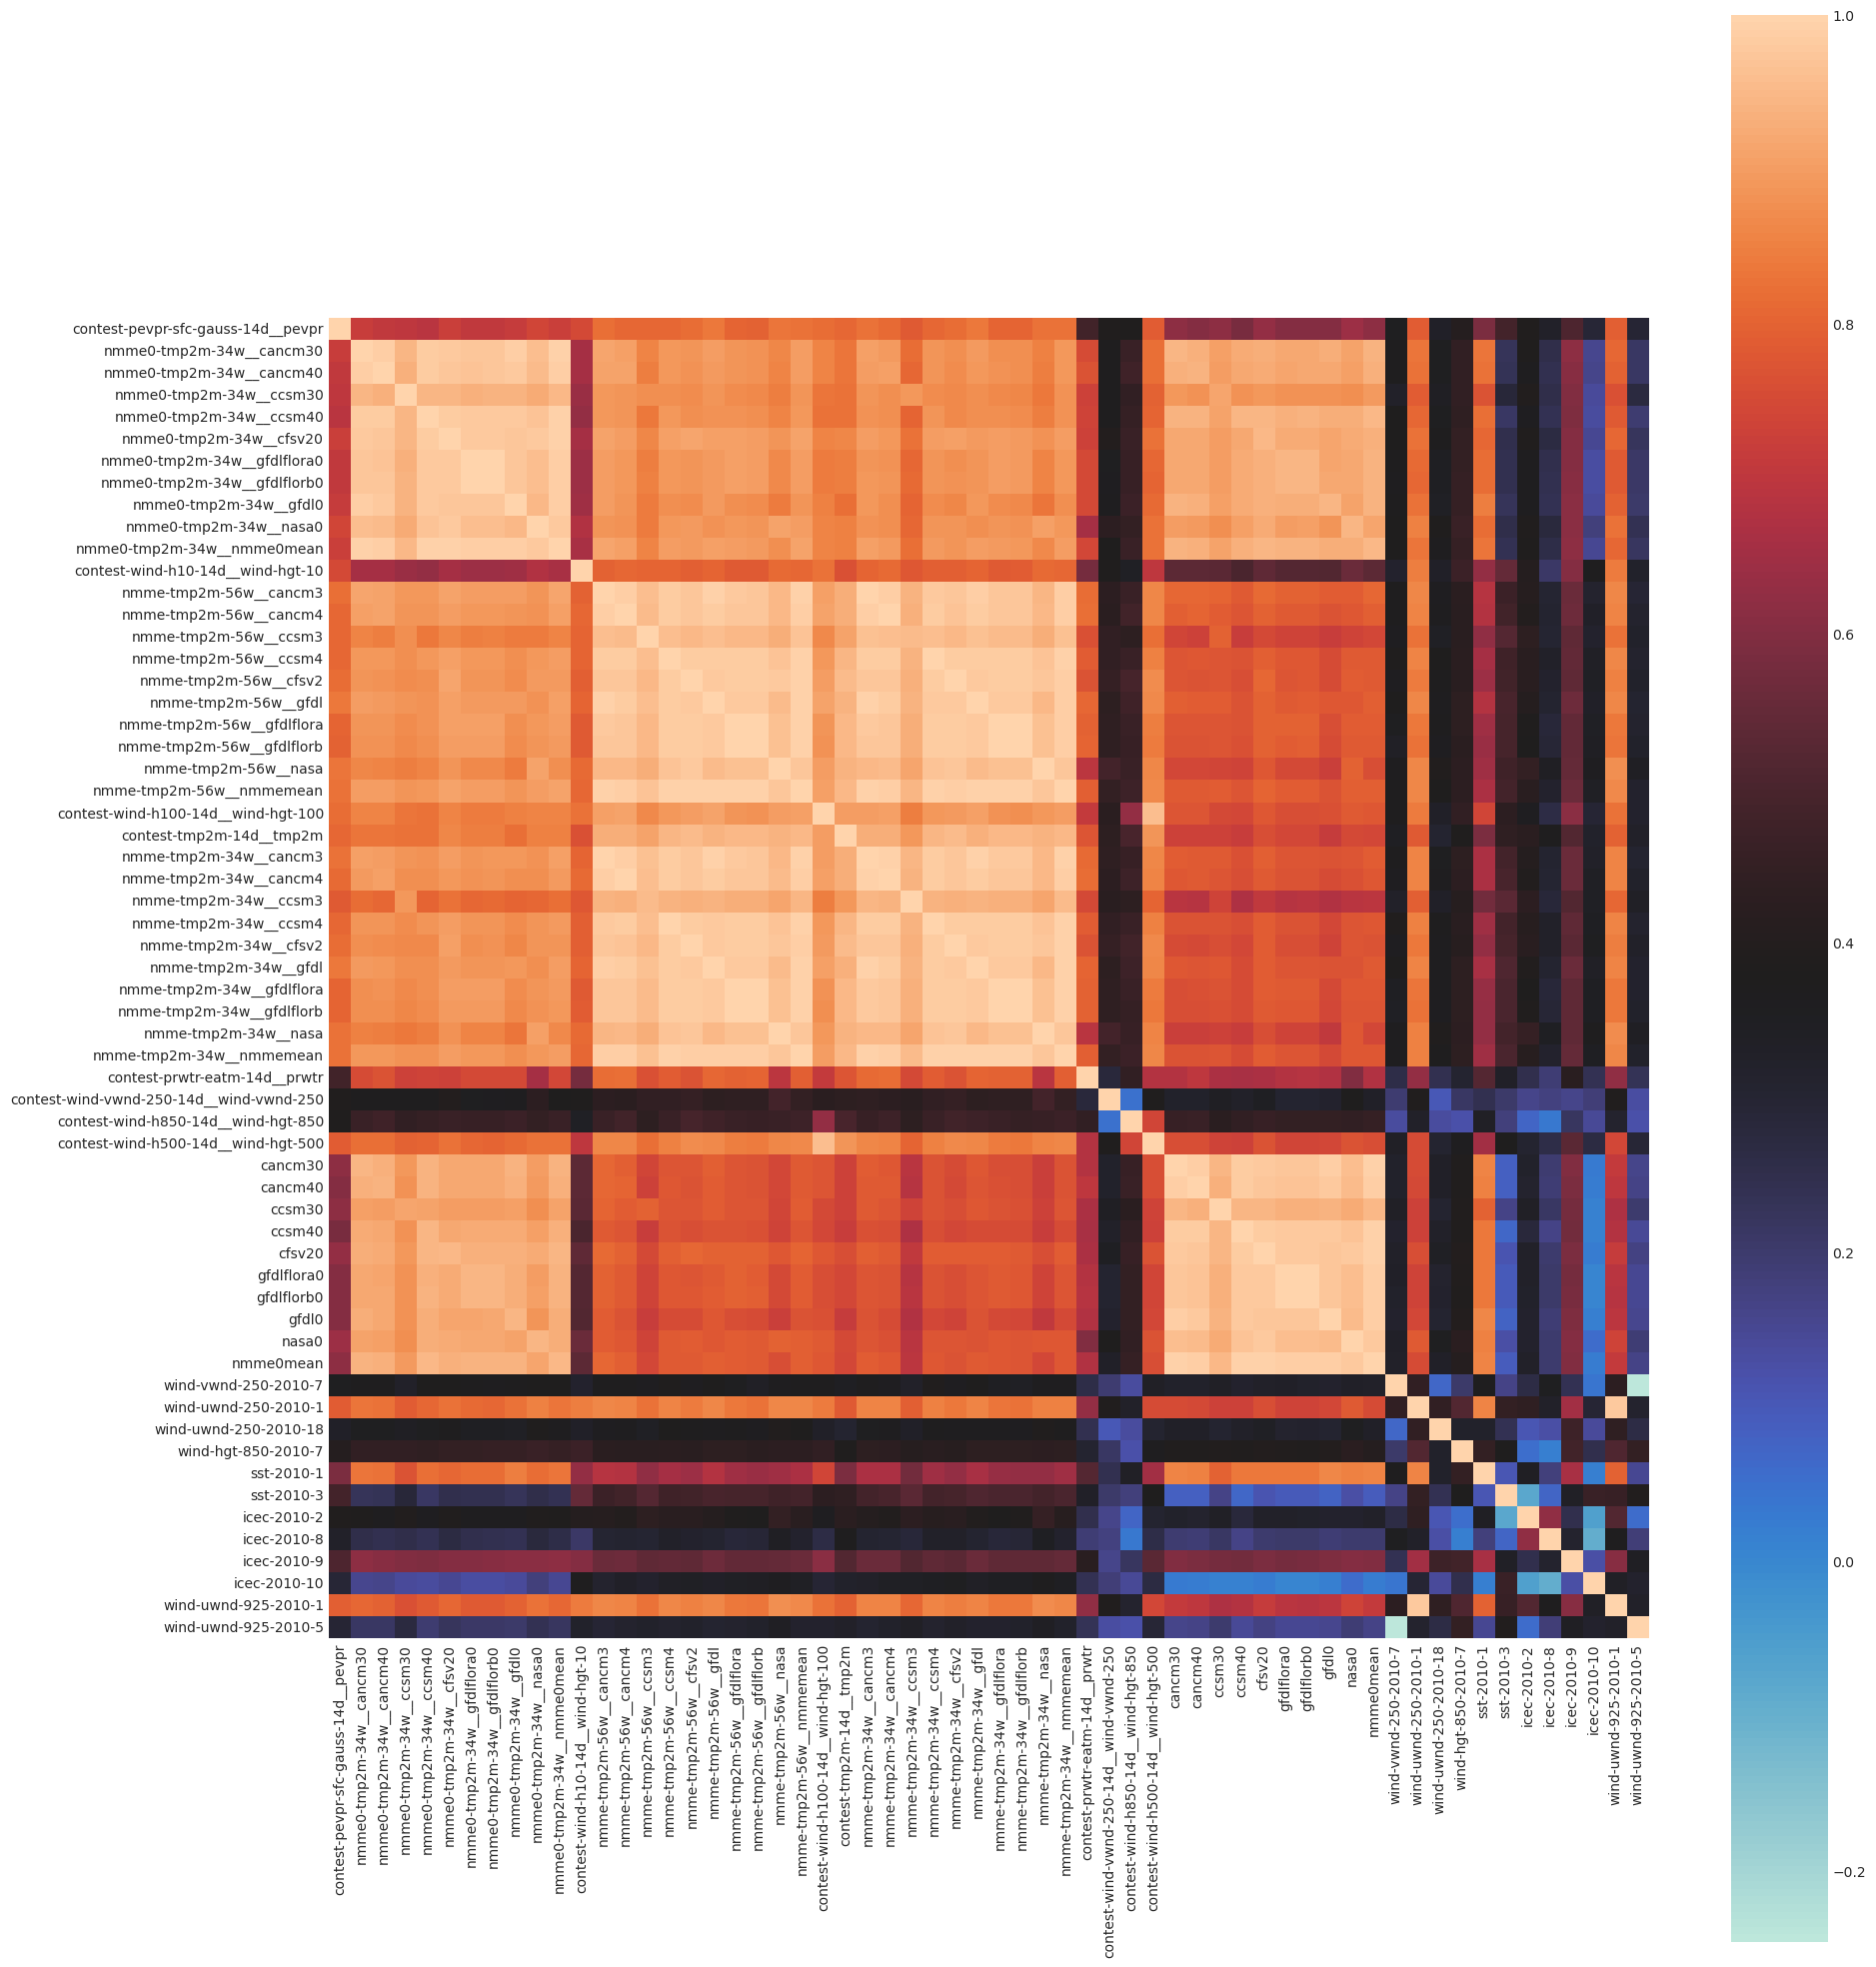

In [99]:
plt.figure(figsize = (20, 20))
sns.heatmap(new_corr_matrix, vmax = 1, square = True, cmap = "icefire", annot = False, fmt = ".2f")

In [154]:
def is_not_containing_c(string):
    """
    Check if the given string does not contain any of the predefined characters in the list c as a substring.
    """
    c = ["cancm30", "cancm40", "ccsm30", "ccsm40", "cfsv20", "gfdlflora0", "gfdlflorb0", "gfdl0", "nasa0", "nmme0mean", "nmme", "nmme0", "mjo1d", "mei"]
    for character in c:
        if character in string:
            return False
    return True


filtered_cols = [col for col in new_cols if is_not_containing_c(col)]
display(filtered_cols)
display(len(filtered_cols))

['contest-pevpr-sfc-gauss-14d__pevpr',
 'contest-wind-h10-14d__wind-hgt-10',
 'contest-wind-h100-14d__wind-hgt-100',
 'contest-tmp2m-14d__tmp2m',
 'contest-prwtr-eatm-14d__prwtr',
 'contest-wind-vwnd-250-14d__wind-vwnd-250',
 'contest-wind-h850-14d__wind-hgt-850',
 'contest-wind-h500-14d__wind-hgt-500',
 'wind-vwnd-250-2010-7',
 'wind-uwnd-250-2010-1',
 'wind-uwnd-250-2010-18',
 'wind-hgt-850-2010-7',
 'sst-2010-1',
 'sst-2010-3',
 'icec-2010-2',
 'icec-2010-8',
 'icec-2010-9',
 'icec-2010-10',
 'wind-uwnd-925-2010-1',
 'wind-uwnd-925-2010-5']

20

<AxesSubplot:>

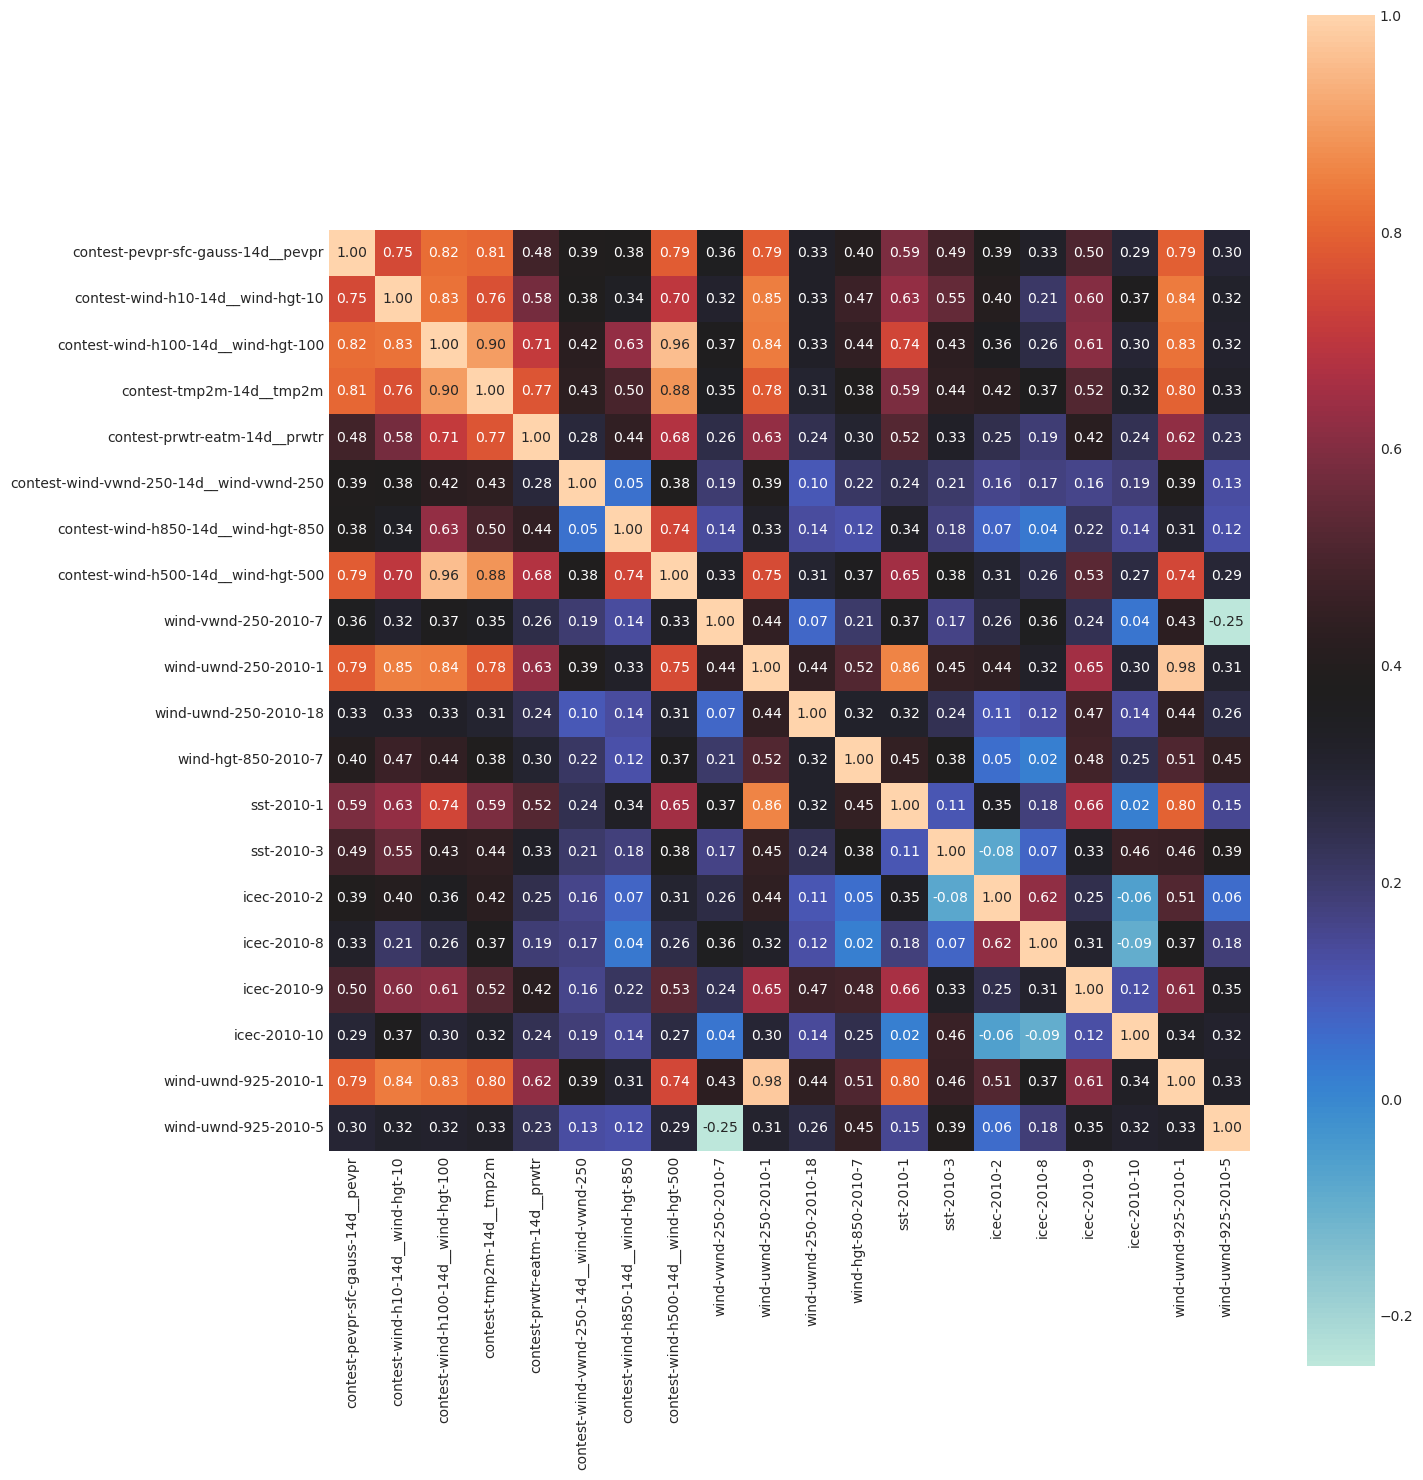

In [100]:
plt.figure(figsize = (15, 15))
sns.heatmap(df[filtered_cols].corr(), vmax = 1, square = True, cmap = "icefire", annot = True, fmt = ".2f")

In [252]:
old_cols = [i for i in df.columns if (is_not_containing_c(i))]
display(len(old_cols))
display(old_cols)

160

['lat',
 'lon',
 'startdate',
 'contest-pevpr-sfc-gauss-14d__pevpr',
 'contest-wind-h10-14d__wind-hgt-10',
 'contest-rhum-sig995-14d__rhum',
 'contest-wind-h100-14d__wind-hgt-100',
 'contest-tmp2m-14d__tmp2m',
 'contest-slp-14d__slp',
 'contest-wind-vwnd-925-14d__wind-vwnd-925',
 'contest-pres-sfc-gauss-14d__pres',
 'contest-wind-uwnd-250-14d__wind-uwnd-250',
 'contest-prwtr-eatm-14d__prwtr',
 'contest-wind-vwnd-250-14d__wind-vwnd-250',
 'contest-precip-14d__precip',
 'contest-wind-h850-14d__wind-hgt-850',
 'contest-wind-uwnd-925-14d__wind-uwnd-925',
 'contest-wind-h500-14d__wind-hgt-500',
 'climateregions__climateregion',
 'elevation__elevation',
 'wind-vwnd-250-2010-1',
 'wind-vwnd-250-2010-2',
 'wind-vwnd-250-2010-3',
 'wind-vwnd-250-2010-4',
 'wind-vwnd-250-2010-5',
 'wind-vwnd-250-2010-6',
 'wind-vwnd-250-2010-7',
 'wind-vwnd-250-2010-8',
 'wind-vwnd-250-2010-9',
 'wind-vwnd-250-2010-10',
 'wind-vwnd-250-2010-11',
 'wind-vwnd-250-2010-12',
 'wind-vwnd-250-2010-13',
 'wind-vwnd-250

<AxesSubplot:>

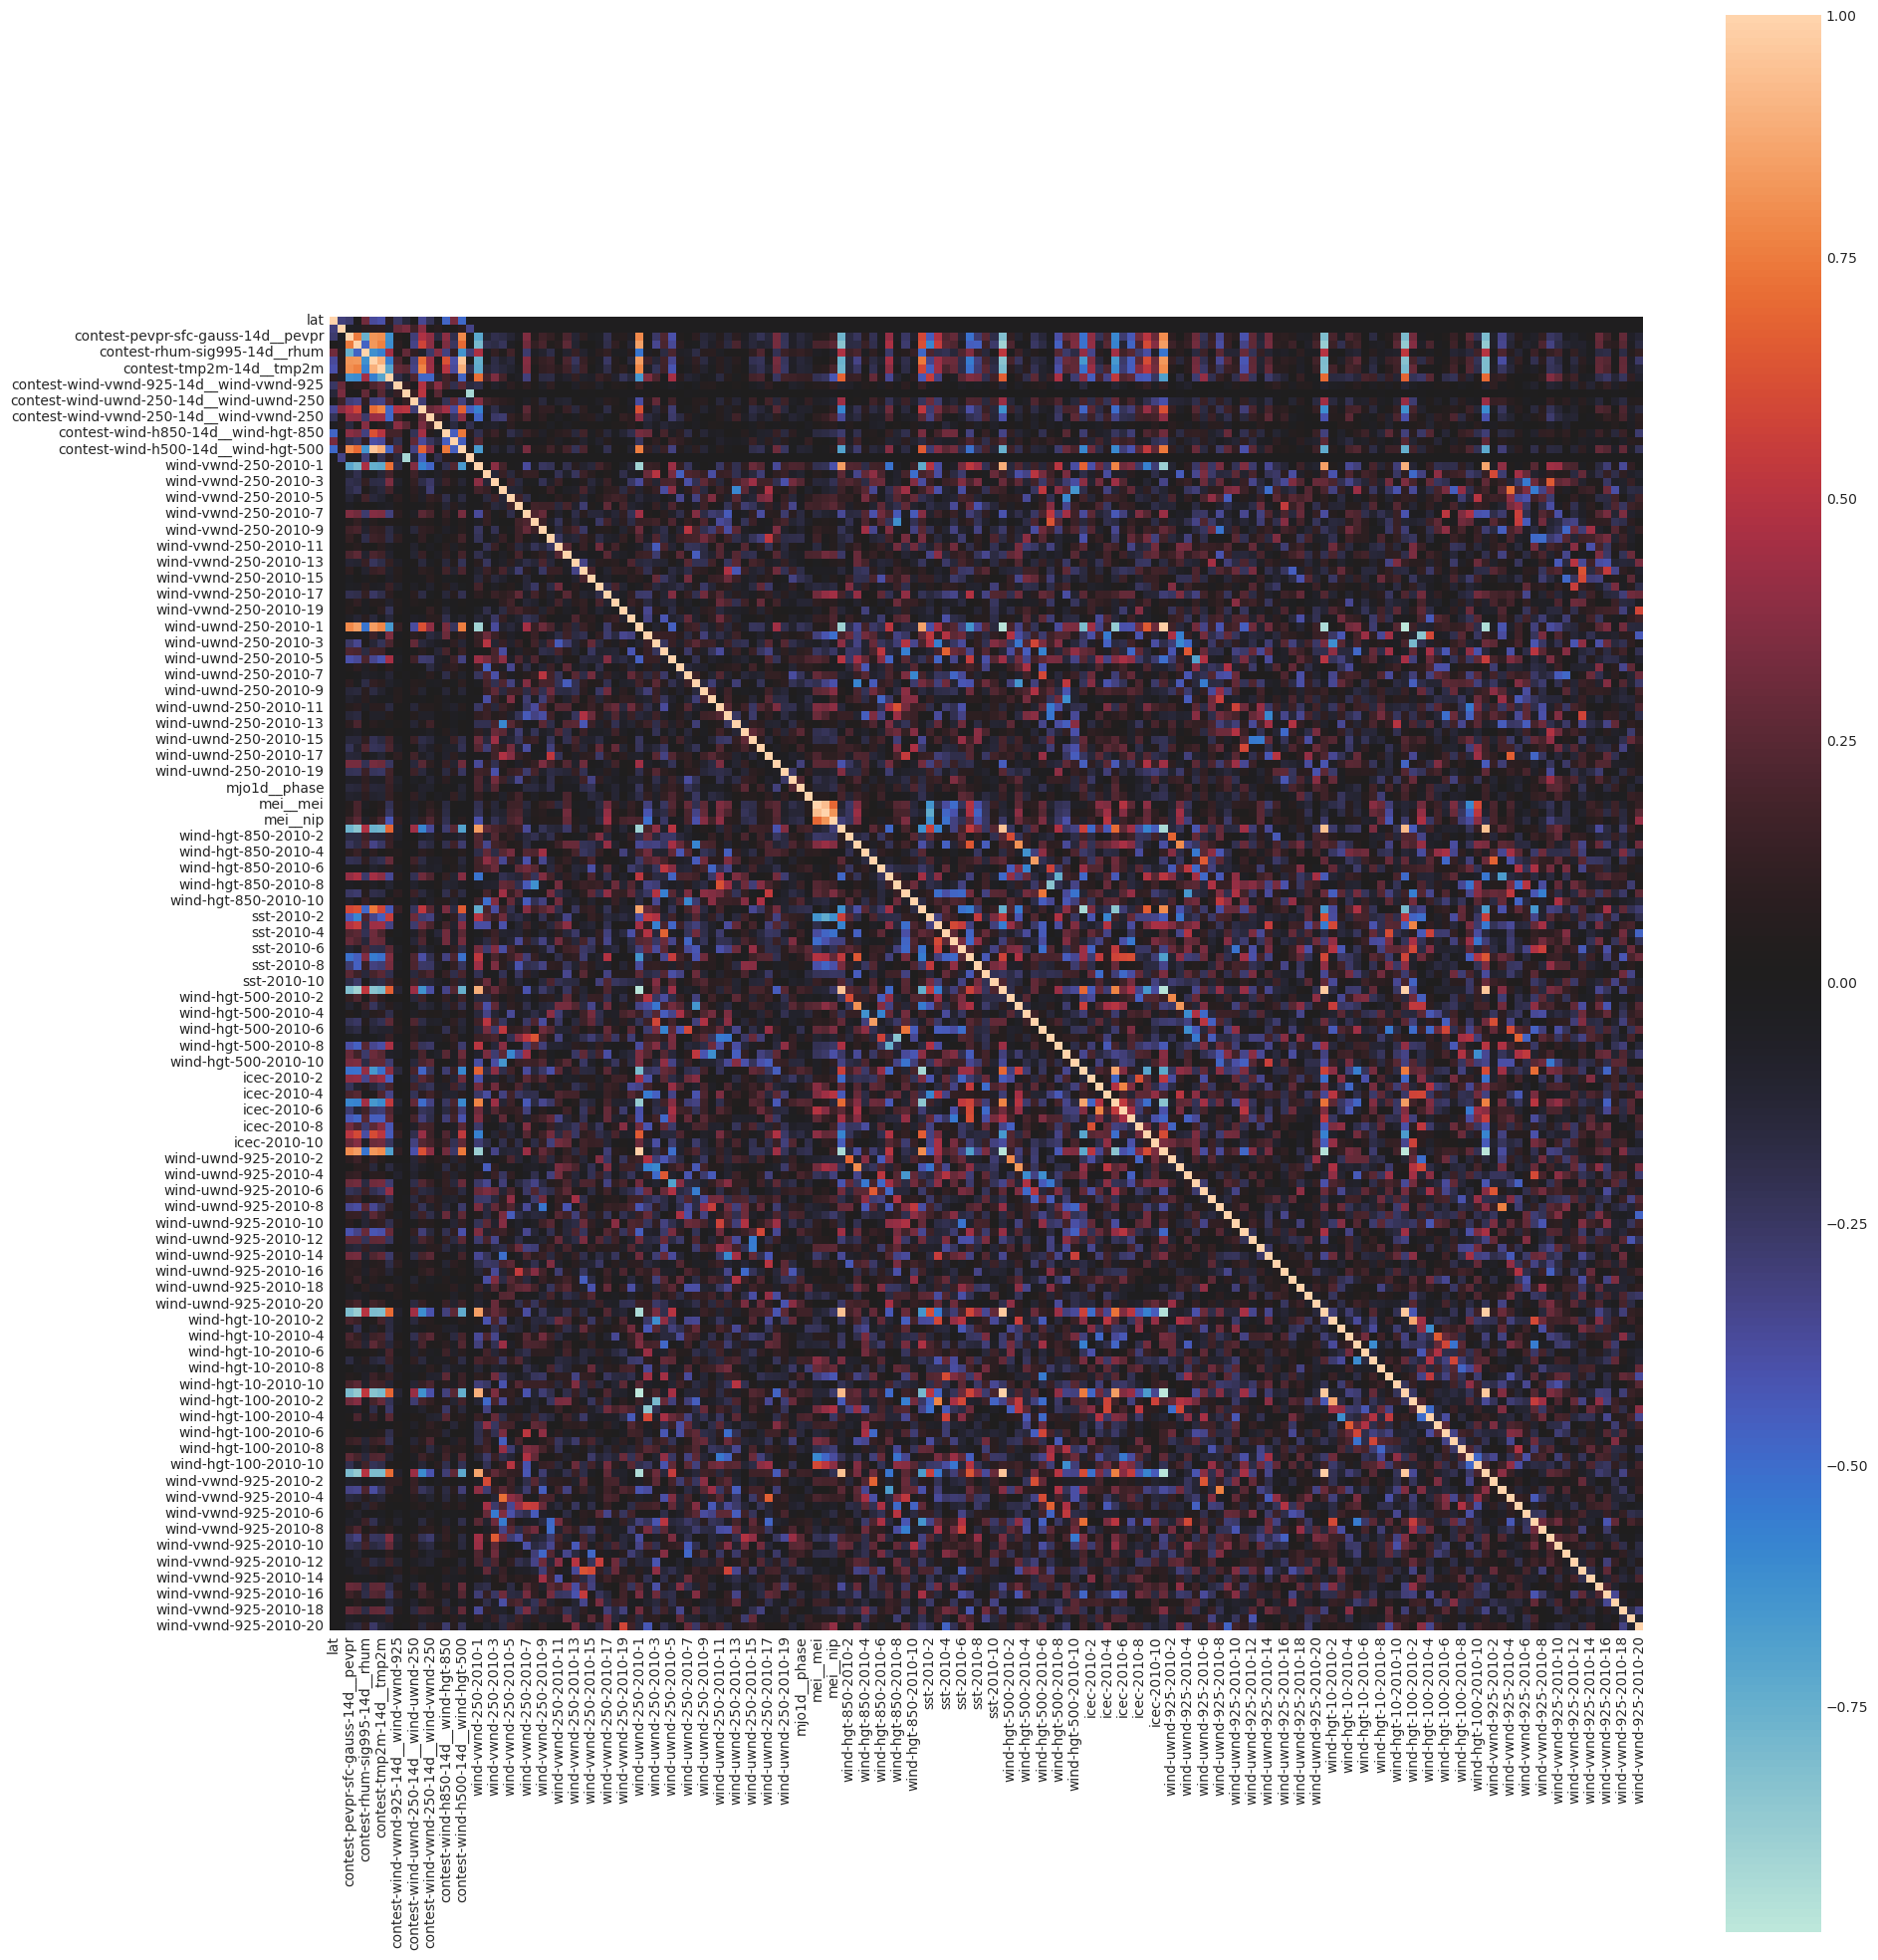

In [153]:
plt.figure(figsize = (20, 20))
sns.heatmap(df[old_cols].corr(), vmax = 1, square = True, cmap = "icefire", annot = False, fmt = ".2f")

In [253]:
old_cols.remove("climateregions__climateregion")
old_cols.remove("contest-pres-sfc-gauss-14d__pres")
# old_cols.remove("wind-hgt-10-2010-9")
# old_cols.remove("wind-hgt-10-2010-5")
# old_cols.remove("wind-hgt-100-2010-2")
# old_cols.remove("wind-hgt-10-2010-3")
# old_cols.remove("wind-hgt-10-2010-2")
# old_cols.remove("wind-hgt-10-2010-8")
# old_cols.remove("wind-hgt-100-2010-1")
# old_cols.remove("wind-hgt-10-2010-4")
# old_cols.remove("wind-hgt-10-2010-6")
# old_cols.remove("wind-hgt-10-2010-1")
# old_cols.remove("wind-hgt-500-2010-2")
# old_cols.remove("wind-hgt-850-2010-1")
# old_cols.remove("wind-hgt-850-2010-3")
# old_cols.remove("wind-hgt-100-2010-8")
# old_cols.remove("wind-hgt-500-2010-1")
# old_cols.remove("wind-hgt-500-2010-6")
# old_cols.remove("wind-hgt-500-2010-4")
# old_cols.remove("wind-hgt-100-2010-4")
# old_cols.remove("wind-hgt-10-2010-10")
# old_cols.remove("wind-hgt-100-2010-3")
# old_cols.remove("wind-hgt-100-2010-7")
# old_cols.remove("wind-hgt-100-2010-9")
# old_cols.remove("wind-hgt-500-2010-3")
# old_cols.remove("wind-hgt-850-2010-2")
old_cols.remove("startdate")


In [254]:
def support(array):
    # Create a new list to hold the filtered elements
    filtered_array = []
    
    # Iterate through each element in the input array
    for element in array:
        # Check if the element starts with "wind"
        if not element.startswith("wind"):
            # If it doesn't, add it to the filtered array
            filtered_array.append(element)
    
    # Return the filtered array
    return filtered_array
old_cols = support(old_cols)
display(len(old_cols))
display(old_cols)

37

['lat',
 'lon',
 'contest-pevpr-sfc-gauss-14d__pevpr',
 'contest-wind-h10-14d__wind-hgt-10',
 'contest-rhum-sig995-14d__rhum',
 'contest-wind-h100-14d__wind-hgt-100',
 'contest-tmp2m-14d__tmp2m',
 'contest-slp-14d__slp',
 'contest-wind-vwnd-925-14d__wind-vwnd-925',
 'contest-wind-uwnd-250-14d__wind-uwnd-250',
 'contest-prwtr-eatm-14d__prwtr',
 'contest-wind-vwnd-250-14d__wind-vwnd-250',
 'contest-precip-14d__precip',
 'contest-wind-h850-14d__wind-hgt-850',
 'contest-wind-uwnd-925-14d__wind-uwnd-925',
 'contest-wind-h500-14d__wind-hgt-500',
 'elevation__elevation',
 'sst-2010-1',
 'sst-2010-2',
 'sst-2010-3',
 'sst-2010-4',
 'sst-2010-5',
 'sst-2010-6',
 'sst-2010-7',
 'sst-2010-8',
 'sst-2010-9',
 'sst-2010-10',
 'icec-2010-1',
 'icec-2010-2',
 'icec-2010-3',
 'icec-2010-4',
 'icec-2010-5',
 'icec-2010-6',
 'icec-2010-7',
 'icec-2010-8',
 'icec-2010-9',
 'icec-2010-10']

In [255]:
data = df[old_cols]
# data = pd.get_dummies(data)
data["day"] = df["startdate"].apply(lambda i : convert_stringtime_to_datetime(i).day)
data["month"] = df["startdate"].apply(lambda i : convert_stringtime_to_datetime(i).month)
data["year"] = df["startdate"].apply(lambda i : convert_stringtime_to_datetime(i).year)
X = data.drop([target], axis = 1)
y = data[target]
display(X.head())

,lat,lon,contest-pevpr-sfc-gauss-14d__pevpr,contest-wind-h10-14d__wind-hgt-10,contest-rhum-sig995-14d__rhum,contest-wind-h100-14d__wind-hgt-100,contest-slp-14d__slp,contest-wind-vwnd-925-14d__wind-vwnd-925,contest-wind-uwnd-250-14d__wind-uwnd-250,contest-prwtr-eatm-14d__prwtr,...,icec-2010-4,icec-2010-5,icec-2010-6,icec-2010-7,icec-2010-8,icec-2010-9,icec-2010-10,day,month,year
index,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.833333,237.00,31246.63,81.72,16666.81,101352.08,4.41,-2.56,42.45,...,-0.16,-0.08,0.15,-0.06,0.03,0.03,0.13,1,9,2014
1,0.0,0.833333,228.90,31244.78,82.56,16667.31,101396.02,3.74,-2.39,42.66,...,-0.16,-0.08,0.15,-0.06,0.03,0.03,0.13,2,9,2014
2,0.0,0.833333,220.69,31239.27,83.29,16668.39,101429.25,3.40,-2.76,43.23,...,-0.16,-0.08,0.15,-0.06,0.03,0.03,0.13,3,9,2014
3,0.0,0.833333,225.28,31232.86,83.26,16667.39,101440.85,3.29,-3.00,43.11,...,-0.16,-0.08,0.15,-0.06,0.03,0.03,0.13,4,9,2014
4,0.0,0.833333,237.24,31226.16,82.50,16665.65,101419.53,3.27,-3.40,42.98,...,-0.16,-0.08,0.15,-0.06,0.03,0.03,0.13,5,9,2014


In [256]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state=42)
display(X_train.shape)
display(X_valid.shape)

(263013, 39)

(112721, 39)

In [264]:
from lightgbm import LGBMRegressor
from sklearn.linear_model import LinearRegression, LassoCV
# hyper_params = {
#     'task': 'train',
#     'boosting_type': 'gbdt',
#     'objective': 'regression',
#     'metric': ['l1','l2'],
#     'learning_rate': 0.005,
#     'feature_fraction': 0.9,
#     'bagging_fraction': 0.7,
#     'bagging_freq': 10,
#     'verbose': 1,
#     "max_depth": 32,
#     "num_leaves": 128,  
#     "max_bin": 512,
#     "num_iterations": 6500
# }
# gbm = LGBMRegressor(**hyper_params)
# gbm.fit(X_train, y_train,
#         eval_set=[(X_valid, y_valid)],
#         eval_metric='l1',
#         early_stopping_rounds=1000)
model = LassoCV()
model.fit(X_train, y_train)

LassoCV()

In [258]:
from sklearn.metrics import mean_squared_error
display(np.sqrt(mean_squared_error(y_valid, gbm.predict(X_valid))))

0.4019206869265696

In [268]:
import eli5
eli5.show_weights(model, top = None, feature_names = X_train.columns.tolist())

Weight?,Feature
+780.805,<BIAS>
+0.093,contest-wind-h850-14d__wind-hgt-850
+0.027,contest-wind-h500-14d__wind-hgt-500
+0.004,contest-wind-h100-14d__wind-hgt-100
+0.003,contest-pevpr-sfc-gauss-14d__pevpr
+0.002,contest-wind-h10-14d__wind-hgt-10
+0.001,sst-2010-4
-0.003,elevation__elevation
-0.004,sst-2010-1
-0.012,contest-slp-14d__slp


In [259]:
t = [i for i in old_cols if (i != target)]
t.append("day")
t.append("month")
t.append("year")
df_test["day"] = df_test["startdate"].apply(lambda i : convert_stringtime_to_datetime(i).day)
df_test["month"] = df_test["startdate"].apply(lambda i : convert_stringtime_to_datetime(i).month)
df_test["year"] = df_test["startdate"].apply(lambda i : convert_stringtime_to_datetime(i).year)
y_pred = gbm.predict(df_test[t])
display(y_pred)

array([29.23923341, 29.45534218, 29.64555028, ...,  4.84138745,
        5.65856992,  5.92720431])

In [261]:
f_i = gbm.feature_importances_
te = pd.DataFrame({"Feature" : t, "Data": f_i}).sort_values(by = "Data", ascending = False)
display(te.tail(30))

,Feature,Data
5,contest-wind-h100-14d__wind-hgt-100,24333
7,contest-wind-vwnd-925-14d__wind-vwnd-925,24010
13,contest-wind-uwnd-925-14d__wind-uwnd-925,23530
3,contest-wind-h10-14d__wind-hgt-10,22644
8,contest-wind-uwnd-250-14d__wind-uwnd-250,19195
10,contest-wind-vwnd-250-14d__wind-vwnd-250,19143
17,sst-2010-2,16708
12,contest-wind-h850-14d__wind-hgt-850,16611
18,sst-2010-3,13812
24,sst-2010-9,13714


([], [])

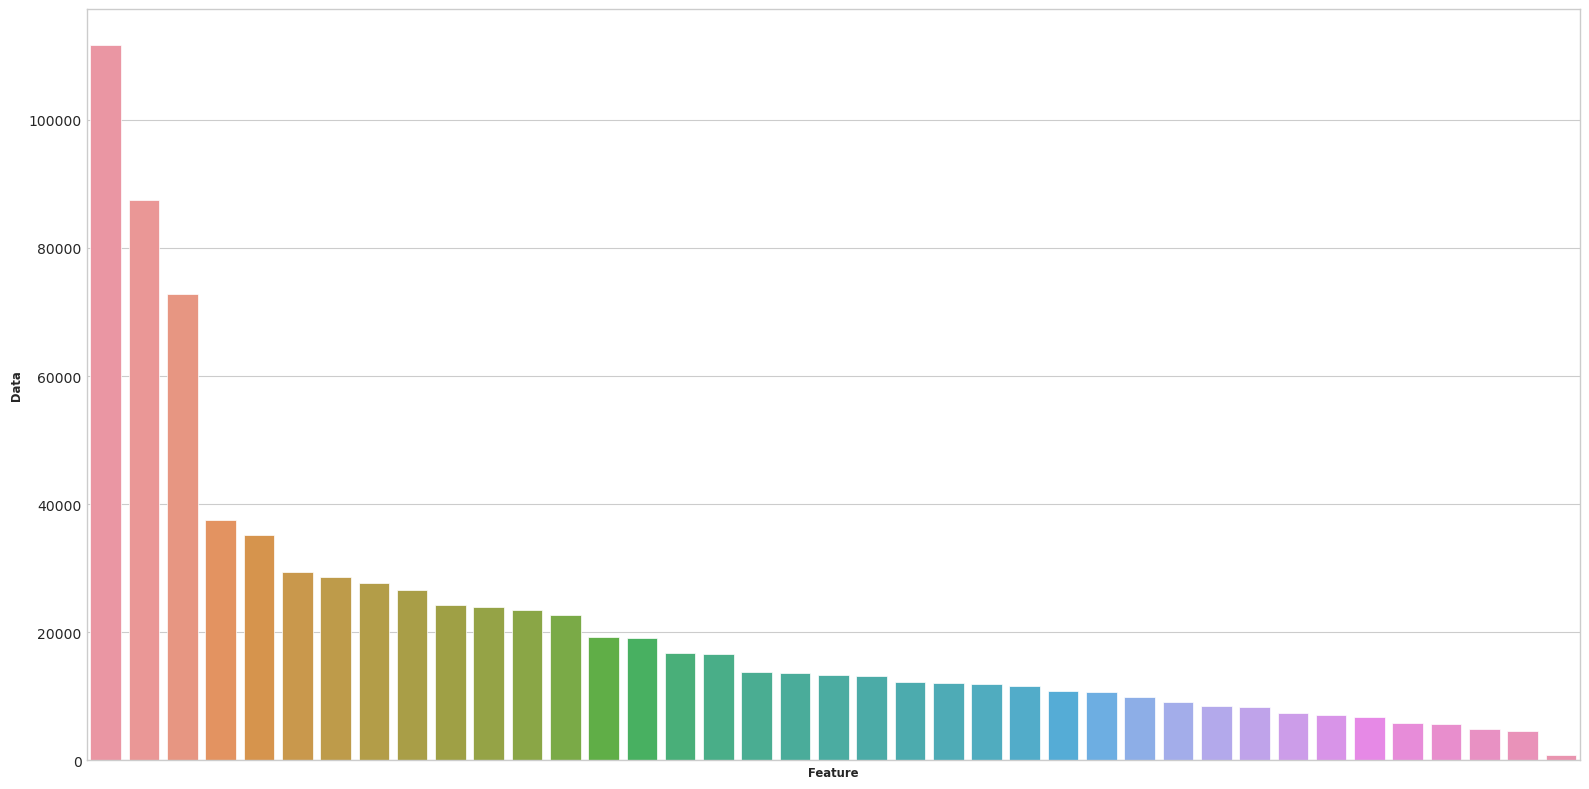

In [263]:
plt.figure(figsize = (16, 8))
sns.barplot(te, x = "Feature", y = "Data")
plt.xticks([], rotation = 45)

In [260]:
output = pd.DataFrame({'contest-tmp2m-14d__tmp2m': y_pred , 'index' : df_test.index})
output.to_csv('submission.csv' , index = False)